In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
import tarfile
import urllib
import sys
import numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
#Reading in Dataset
df = pd.read_csv(r'C:\Users\lando\OneDrive\Desktop\IAA\Side-project\CreditCard\BankChurners.csv')

#Removing unhelpful variables
df = df[df.columns[1:21]]

#Creating Copy
df_norm = df.copy()

#One hot encoding for categorical variables
df_norm = pd.get_dummies(df_norm, columns=["Attrition_Flag", "Gender", "Education_Level","Marital_Status", "Income_Category", "Card_Category"])

#Creating data preprocessor class
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)


#Creating K-means clustering class - 6 clusters
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=6,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)


#Consolidating classes to perform clusters
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)


#Calling my data for clustering
pipe.fit(df_norm)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=6, n_init=50,
                                         random_state=42))]))])

In [3]:
#Calculating Silhouette Score. Closer to 1 means that the clusters are well separated
preprocessed_data = pipe["preprocessor"].transform(df_norm)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.6492663741734918

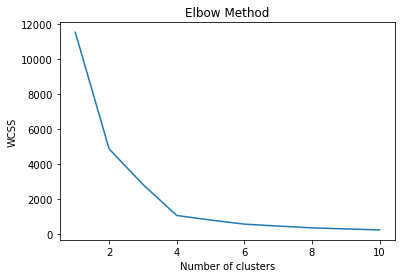

In [4]:
#Elbow Plot to determine Optimal # of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(preprocessed_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\lando\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


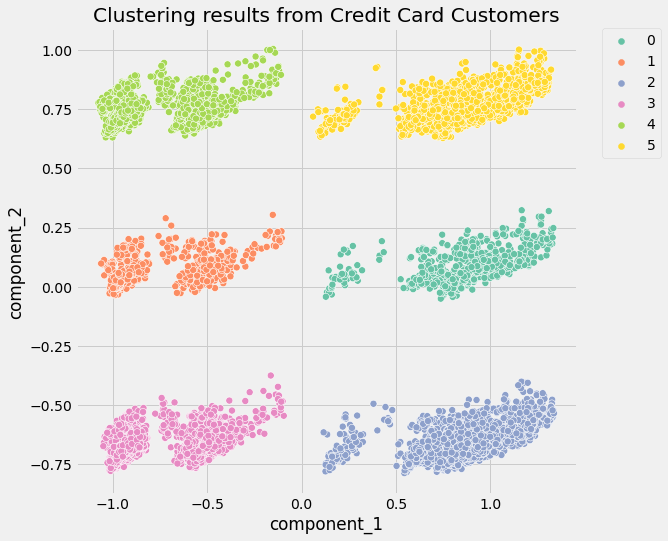

In [5]:
#Plotting Clusters
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(df_norm),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = predicted_labels


plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette="Set2",
)

scat.set_title(
    "Clustering results from Credit Card Customers"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()


In [6]:
#Creating Array of Cluster Labels
cluster_labels = pipe["clusterer"]["kmeans"].labels_

#Adding 'cluster' column to df
df_norm['cluster'] = cluster_labels.tolist()

In [7]:
#Viewing Mean for Each Variable
df_norm_groupings = df_norm.groupby(['cluster']).mean()

In [8]:
#New Clustering without Demographic 

In [9]:
#Reading in Dataset
df = pd.read_csv(r'C:\Users\lando\OneDrive\Desktop\IAA\Side-project\CreditCard\BankChurners.csv')

#Creating Copy
df_norm = df.copy()

#Removing unhelpful variables
df_norm = df_norm[df_norm.columns[1:21]]



In [10]:
#One Hot Encoding
df = pd.get_dummies(df_norm, columns=["Attrition_Flag", "Gender", "Education_Level","Marital_Status", "Income_Category", "Card_Category"])

In [11]:
#Dropping Demographic Related Variables
df_norm.drop(['Attrition_Flag', 'Card_Category', 'Gender', 'Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category'], axis=1, inplace=True)

In [12]:
#Creating data preprocessor class
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)


#Creating K-means clustering class - 4 Clusters
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)


#Consolidating classes to perform clusters
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)


#Calling my data for clustering
pipe.fit(df_norm)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=42))]))])

In [13]:
#Calculating Silhouette Score. Closer to 1 means that the clusters are well separated
preprocessed_data = pipe["preprocessor"].transform(df_norm)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.4271329490293001

In [ ]:
#Elbow Plot to determine Optimal # of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(preprocessed_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Changing Cluster Names
predicted_labels = [str(x) for x in predicted_labels]
replacements = {'0':'Churning, Inactive Card Users', '1':'Credit Dependent, Highly Active Card Users','2':'Affluent, Inactive Card Users', '3':'The Average, Satisfied Primary Card Users'}
replacer = replacements.get
predicted_labels = [replacer(n, n) for n in predicted_labels]

In [ ]:
#Plotting Clusters
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(df_norm),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = predicted_labels


plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette="Set2",
)

scat.set_title(
    "Card User Clusters"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()


In [ ]:
#Creating Array of Cluster Labels
cluster_labels = pipe["clusterer"]["kmeans"].labels_

#Adding 'cluster' column to df
df['cluster'] = cluster_labels.tolist()

In [ ]:
#Viewing Mean for Each Variable
df_norm_groupings = df.groupby(['cluster']).mean()